In [ ]:
import torch

In [ ]:
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor

In [ ]:
transform=ToTensor()

In [ ]:
cifar100_train=CIFAR100(root='./data_cifar100',train=True,download=True,transform=transform)
cifar100_test=CIFAR100(root='./data_cifar100',train=False,download=True,transform=transform)

100%|██████████| 169M/169M [00:11<00:00, 14.9MB/s]


Extracting ./data_cifar100/cifar-100-python.tar.gz to ./data_cifar100
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader=DataLoader(cifar100_train,batch_size=16)
test_loader=DataLoader(cifar100_test,batch_size=16)

In [ ]:
for train_item in train_loader:
  pass

In [ ]:
type(train_item)

list

In [ ]:
len(train_item)

2

In [ ]:
train_item[0].shape

torch.Size([16, 3, 32, 32])

In [ ]:
train_item[1].shape

torch.Size([16])

In [ ]:
train_item[1]

tensor([45, 48, 20, 34, 87, 64, 26, 16, 53, 33, 97, 80,  7,  3,  7, 73])

In [ ]:
train_item[0]

tensor([[[[0.4353, 0.4353, 0.3686,  ..., 0.6314, 0.6471, 0.4745],
          [0.4275, 0.4431, 0.4039,  ..., 0.6039, 0.6078, 0.4000],
          [0.3569, 0.4039, 0.3804,  ..., 0.4941, 0.4000, 0.3608],
          ...,
          [0.8824, 0.7961, 0.7412,  ..., 0.7647, 0.7255, 0.7686],
          [0.9176, 0.8157, 0.7255,  ..., 0.7843, 0.8588, 0.8745],
          [0.9333, 0.8275, 0.7020,  ..., 0.9176, 0.9098, 0.9098]],

         [[0.5608, 0.5804, 0.4941,  ..., 0.7059, 0.7216, 0.5216],
          [0.5373, 0.5843, 0.5412,  ..., 0.6627, 0.6863, 0.4745],
          [0.4196, 0.5137, 0.5059,  ..., 0.5529, 0.4863, 0.4667],
          ...,
          [0.8510, 0.6941, 0.6235,  ..., 0.6235, 0.7176, 0.8039],
          [0.8980, 0.7059, 0.5765,  ..., 0.7804, 0.9137, 0.9176],
          [0.8902, 0.6863, 0.5098,  ..., 0.9451, 0.9490, 0.9412]],

         [[0.6196, 0.6118, 0.5098,  ..., 0.7529, 0.7569, 0.5294],
          [0.5843, 0.6118, 0.5490,  ..., 0.6941, 0.7255, 0.5059],
          [0.4588, 0.5529, 0.5137,  ..., 0

In [ ]:
images_np_list=[]
labels_np_list=[]
for img,label in train_loader:
  pass
print(type(img))

<class 'torch.Tensor'>


In [ ]:
import numpy as np


In [ ]:
images_np_list=[]
labels_np_list=[]
for img,label in train_loader:
  images_np_list.append(np.array(img.numpy()*255, dtype=np.uint8))
  labels_np_list.append(label.numpy())

In [ ]:
images_np_list[2].shape

(16, 3, 32, 32)

In [ ]:
images_np_list[2][3].shape

(3, 32, 32)

In [ ]:
images_np_cat=np.concatenate(images_np_list)
labels_np_cat=np.concatenate(labels_np_list)

In [ ]:
images_np_cat.shape

(50000, 3, 32, 32)

In [ ]:
labels_np_cat.shape

(50000,)

In [ ]:
images_np_list_new=[]
for image in images_np_cat:
  images_np_list_new.append(np.moveaxis(image,0,-1))

In [ ]:
images_np_list_new[0].shape

(32, 32, 3)

In [ ]:
images_np_new=np.array(images_np_list_new)

In [ ]:
type(labels_np_cat)

numpy.ndarray

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
images_to_plot=images_np_new[:9]

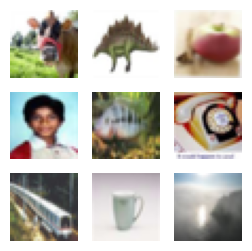

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(3,3))
for i ,ax in enumerate(axes.flat):
  ax.imshow(images_to_plot[i])
  ax.axis('off')
plt.show()

In [ ]:
labels_np_cat[:9]

array([19, 29,  0, 11,  1, 86, 90, 28, 23])

In [ ]:
images_np_new.mean()

121.936059453125

In [ ]:
images_np_new.std()

68.38895658894927

In [ ]:
np.median(images_np_new)

116.0

In [ ]:
np.min(images_np_new)

0

In [ ]:
np.max(images_np_new)

255

In [ ]:
import tqdm

In [ ]:
cifar_100_hist=np.zeros(256,dtype=np.int32)
for img in tqdm.tqdm(images_np_new):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for c in range(img.shape[2]):
        intensity=img[i,j,c]
        cifar_100_hist[intensity]+=1

100%|██████████| 50000/50000 [07:46<00:00, 107.17it/s]


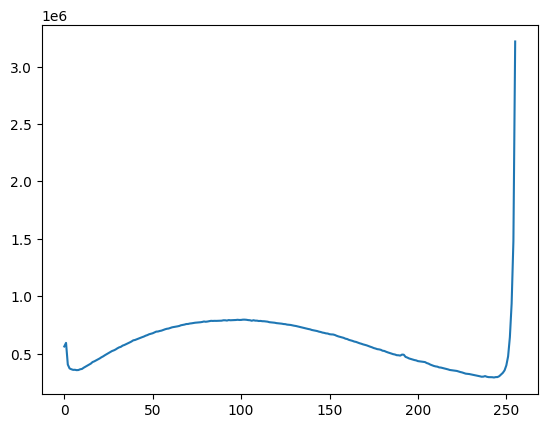

In [ ]:
plt.plot(cifar_100_hist)
plt.show()

In [ ]:
for test_item in test_loader:
  pass

In [ ]:
test_item

[tensor([[[[0.2078, 0.1843, 0.2314,  ..., 0.3569, 0.2980, 0.2980],
           [0.1490, 0.1686, 0.1922,  ..., 0.3490, 0.2941, 0.2392],
           [0.1647, 0.2706, 0.2157,  ..., 0.3255, 0.3176, 0.2745],
           ...,
           [0.3686, 0.4431, 0.5255,  ..., 0.2431, 0.2706, 0.3412],
           [0.3765, 0.4196, 0.4706,  ..., 0.3451, 0.3804, 0.4039],
           [0.3490, 0.3804, 0.4314,  ..., 0.4863, 0.4392, 0.3686]],
 
          [[0.2392, 0.2235, 0.2667,  ..., 0.4000, 0.3373, 0.3294],
           [0.1804, 0.2039, 0.2275,  ..., 0.3961, 0.3333, 0.2745],
           [0.2000, 0.3059, 0.2510,  ..., 0.3765, 0.3608, 0.3137],
           ...,
           [0.3843, 0.4588, 0.5333,  ..., 0.2667, 0.3176, 0.4118],
           [0.4039, 0.4431, 0.4863,  ..., 0.3725, 0.4353, 0.4863],
           [0.3569, 0.3843, 0.4314,  ..., 0.4980, 0.4706, 0.4235]],
 
          [[0.2784, 0.2431, 0.2784,  ..., 0.3373, 0.3059, 0.3294],
           [0.2275, 0.2353, 0.2471,  ..., 0.3490, 0.3255, 0.3020],
           [0.2275, 0.33

In [ ]:
type(test_item)

list

In [ ]:
len(test_item)

2

In [ ]:
test_item[0][3].shape

torch.Size([3, 32, 32])

In [ ]:
test_item[0].shape

torch.Size([16, 3, 32, 32])

In [ ]:
images_test_np_list=[]
labels_test_np_list=[]
for image,lebel in test_loader:
  images_test_np_list.append(np.array(image.numpy()*255,dtype=np.uint8))
  labels_test_np_list.append(label.numpy())

In [ ]:
images_test_np_list[10].shape

(16, 3, 32, 32)

In [ ]:
labels_test_np_list[10].shape

(16,)

In [ ]:
len(images_test_np_list)

625

In [ ]:
images_test_cat=np.concatenate(images_test_np_list)
labels_test_cat=np.concatenate(labels_test_np_list)

In [ ]:
images_test_cat.shape

(10000, 3, 32, 32)

In [ ]:
images_test_list_new=[]
for img in images_test_cat:
  images_test_list_new.append(np.moveaxis(img,0,-1))

In [ ]:
images_test_list_new[10].shape

(32, 32, 3)

In [ ]:
images_test_np=np.array(images_test_list_new)

In [ ]:
images_test_to_plot=images_test_np[:9]

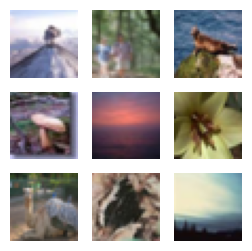

In [ ]:
fig ,axes=plt.subplots(3,3,figsize=(3,3))
for i , ax in enumerate(axes.flat):
  ax.imshow(images_test_to_plot[i])
  ax.axis('off')
plt.show()

In [ ]:
labels_test_cat[:9]

array([45, 48, 20, 34, 87, 64, 26, 16, 53])

In [ ]:
images_test_np.shape

(10000, 32, 32, 3)

In [ ]:
images_test_np.mean()

122.24118916015625

In [ ]:
images_test_np.std()

68.63056877656643

In [ ]:
np.median(images_test_np)

117.0

In [ ]:
np.min(images_test_np)

0

In [ ]:
np.max(images_test_np)

255

In [ ]:
cifar_100_test_hist=np.zeros(256,dtype=np.int32)
for img in tqdm.tqdm(images_test_np):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for c in range(img.shape[2]):
        intensity=img[i,j,c]
        cifar_100_test_hist[intensity]+=1

100%|██████████| 10000/10000 [01:32<00:00, 108.10it/s]


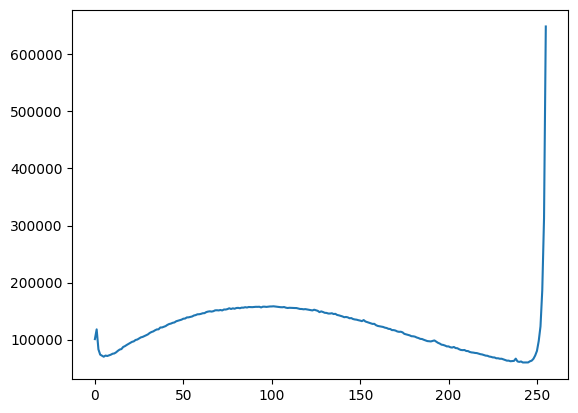

In [ ]:
plt.plot(cifar_100_test_hist)
plt.show()